In [1]:
# !pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
print(f"tensorflow version is : {tf.__version__}")

tensorflow version is : 2.15.0


In [4]:
bee_train_dir = "./data/train/bee/"
wasp_train_dir = "./data/train/wasp/"
bee_test_dir = "./data/test/bee/"
wasp_test_dir = "./data/test/wasp/"

`Load Image`

In [5]:
# !pip install Pillow

./data/train/bee/210210150_4d7e48e5f6_w.jpg


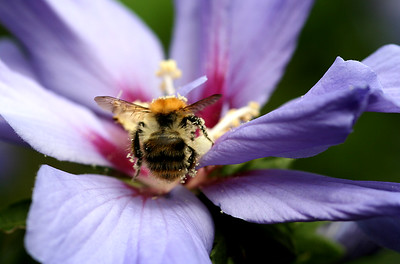

In [6]:
from tensorflow.keras.preprocessing.image import load_img

sample_image = bee_train_dir + "210210150_4d7e48e5f6_w.jpg"
print(sample_image)
load_img(sample_image)

### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(150, 150, 3)`
* Next, create a convolutional layer ([`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation 
* Reduce the size of the feature map with max pooling ([`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use [`SGD`](https://keras.io/api/optimizers/sgd/) with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`

For clarification about kernel size and max pooling, check [Office Hours](https://www.youtube.com/watch?v=1WRgdBTUaAc).

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

def make_model(input_size):
    # sequential model instance
    model = models.Sequential()

    # Create convolutional layer (Conv2D)
        # filter = 32
        # kernal size = (3,3)
        # activation function = 'relu'
    conv_layer = layers.Conv2D(
        filters = 32,
        kernel_size=(3, 3),
        activation="relu",
        input_shape=(input_size, input_size, 3)
    )

    # add layer in model
    model.add(conv_layer)

    # Add MaxPooling2D layer with pooling (2,2)
    max_pooling_layer = layers.MaxPooling2D((2,2))

    model.add(max_pooling_layer)

    # convert multi dimention into vector using Flatten layer
    model.add(layers.Flatten())

    # dense layer
    dense_layer = layers.Dense(64, activation='relu')
    model.add(dense_layer)

    # output layer with 
        # neuron = 1
        # activation = 'sigmoid'
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

### Model Compile

In [8]:
def compile_model(model, optimizer):
    model.compile(optimizer = optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [9]:
from tensorflow.keras.optimizers import SGD

model = make_model(150)
sgd_optimizer = SGD(learning_rate=0.002, momentum=0.8)

model.compile(optimizer = sgd_optimizer,
              loss='binary_crossentropy',
              metrics=['acc'])


### Question 1

Since we have a binary classification problem, what is the best loss function for us?
* mean squared error`
* binary crossentropy
* categorical crossentropy
* cosine similarity
    
* <b>Answer<b> : `binary crossentropy`

### Load Data

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_data(input_size, path):
    train_gen = ImageDataGenerator()
    ds = train_gen.flow_from_directory(
        path,
        target_size = (input_size, input_size),
        batch_size=32
    )
    return ds

In [11]:
train_ds = load_data(150, './data/train')
test_ds = load_data(150, './data/test')

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [12]:
train_ds.class_indices

{'bee': 0, 'wasp': 1}

In [13]:
test_ds.class_indices

{'bee': 0, 'wasp': 1}

### Train model on train data

In [14]:
# !pip install scipy

In [15]:
history = model.fit(train_ds, epochs=1, validation_data=test_ds)



115/115 [==============================] - 16s 127ms/step - loss: 512.7785 - acc: 0.5000 - val_loss: 0.6934 - val_acc: 0.5000


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
______________

### Question 2

What's the number of parameters in the convolutional layer of our model? You can use the `summary` method for that. 

* 1 
* 65
* 896
* 11214912

`Answer: ` 896

### Generators and Training

For the next two questions, use the following data generator for both train and test sets:

```python
ImageDataGenerator(rescale=1./255)
```

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/test directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and test sets. 

For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```

In [19]:
def load_data(input_size, path):
    train_gen = ImageDataGenerator(rescale=1./255)
    ds = train_gen.flow_from_directory(
        path,
        target_size = (input_size, input_size),
        batch_size=20,
        shuffle=True,
        class_mode='binary'
    )
    return ds

In [20]:
train_ds = load_data(150, './data/train')
test_ds = load_data(150, './data/test')

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [21]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
184/184 [==============================] - 17s 85ms/step - loss: 0.6919 - acc: 0.5374 - val_loss: 0.6912 - val_acc: 0.5374
Epoch 2/10
184/184 [==============================] - 15s 83ms/step - loss: 0.6909 - acc: 0.5375 - val_loss: 0.6906 - val_acc: 0.5367
Epoch 3/10
184/184 [==============================] - 15s 83ms/step - loss: 0.6905 - acc: 0.5373 - val_loss: 0.6905 - val_acc: 0.5367
Epoch 4/10
184/184 [==============================] - 14s 78ms/step - loss: 0.6904 - acc: 0.5374 - val_loss: 0.6904 - val_acc: 0.5372
Epoch 5/10
184/184 [==============================] - 15s 79ms/step - loss: 0.6904 - acc: 0.5374 - val_loss: 0.6904 - val_acc: 0.5365
Epoch 6/10
184/184 [==============================] - 15s 84ms/step - loss: 0.6903 - acc: 0.5374 - val_loss: 0.6903 - val_acc: 0.5371
Epoch 7/10
184/184 [==============================] - 15s 79ms/step - loss: 0.6902 - acc: 0.5375 - val_loss: 0.6903 - val_acc: 0.5373
Epoch 8/10
184/184 [==============================] - 15s 82ms

In [22]:
history.history

{'loss': [0.6918895244598389,
  0.6908847689628601,
  0.6905330419540405,
  0.6904067993164062,
  0.6903554797172546,
  0.6903306841850281,
  0.6902434825897217,
  0.6901703476905823,
  0.6900277137756348,
  0.6897859573364258],
 'acc': [0.537436306476593,
  0.5374839901924133,
  0.5373402237892151,
  0.5374360680580139,
  0.537388026714325,
  0.5373881459236145,
  0.5374840497970581,
  0.5374839901924133,
  0.5374360680580139,
  0.5382034182548523],
 'val_loss': [0.6912374496459961,
  0.690640389919281,
  0.6904629468917847,
  0.690393328666687,
  0.6903638243675232,
  0.6903383135795593,
  0.6903056502342224,
  0.6902598142623901,
  0.690170407295227,
  0.6900094747543335],
 'val_acc': [0.5374396443367004,
  0.5367149710655212,
  0.536715030670166,
  0.537198007106781,
  0.5364733934402466,
  0.5370773077011108,
  0.5373188257217407,
  0.5370771884918213,
  0.5369564294815063,
  0.5392512083053589]}

### Question 3

What is the median of training accuracy for all the epochs for this model?

* 0.20
* 0.40
* 0.60
* 0.80

`Answer: ` 0.60

### Question 4

What is the standard deviation of training loss for all the epochs for this model?

* 0.031
* 0.061
* 0.091
* 0.131

`Answer: ` 0.031

### Data Augmentation

For the next two questions, we'll generate more data using data augmentations. 

Add the following augmentations to your training data generator:

* `rotation_range=50,`
* `width_shift_range=0.1,`
* `height_shift_range=0.1,`
* `zoom_range=0.1,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`

In [23]:
train_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=50,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest'
                               )

In [25]:
def load_data(input_size, path):
    train_gen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=50,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
    ds = train_gen.flow_from_directory(
        path,
        target_size = (input_size, input_size),
        batch_size=20,
        shuffle=True,
        class_mode='binary'
    )
    return ds

In [26]:
train_ds = load_data(150, './data/train/')

Found 3677 images belonging to 2 classes.


In [27]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
184/184 [==============================] - 49s 267ms/step - loss: 0.6896 - acc: 0.5390 - val_loss: 0.6897 - val_acc: 0.5403
Epoch 2/10
184/184 [==============================] - 41s 220ms/step - loss: 0.6891 - acc: 0.5433 - val_loss: 0.6893 - val_acc: 0.5391
Epoch 3/10
184/184 [==============================] - 41s 222ms/step - loss: 0.6882 - acc: 0.5512 - val_loss: 0.6887 - val_acc: 0.5414
Epoch 4/10
184/184 [==============================] - 41s 220ms/step - loss: 0.6876 - acc: 0.5490 - val_loss: 0.6881 - val_acc: 0.5541
Epoch 5/10
184/184 [==============================] - 41s 222ms/step - loss: 0.6870 - acc: 0.5550 - val_loss: 0.6876 - val_acc: 0.5531
Epoch 6/10
184/184 [==============================] - 41s 220ms/step - loss: 0.6864 - acc: 0.5508 - val_loss: 0.6873 - val_acc: 0.5534
Epoch 7/10
184/184 [==============================] - 40s 217ms/step - loss: 0.6859 - acc: 0.5504 - val_loss: 0.6872 - val_acc: 0.5512
Epoch 8/10
184/184 [==============================] - 4

### Question 5 

Let's train our model for 10 more epochs using the same code as previously.
> **Note:** make sure you don't re-create the model - we want to continue training the model
we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

* 0.18
* 0.48
* 0.78
* 0.108

> **Answer:** 0.78

In [29]:
import numpy as np
mean = np.mean(history.history["val_loss"])
mean

0.6878600120544434

### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?

* 0.38
* 0.58
* 0.78
* 0.98

> **Answer:** 0.58

In [30]:
test_accuracy = np.mean(history.history["val_acc"][5:])
test_accuracy

0.5532125473022461